# Handling Missing Data

## Context:
You’ve received a small dataset (e.g., customer survey or environmental readings) where several fields are missing — some are blanks, others NaN, others placeholders like "unknown" or -999. The goal is not to “fix everything” but to develop intuition for detecting, quantifying, and reasoning about missing data before deciding how to handle it.

## Purpose:
This mini session reinforces your ability to:

* Detect missingness in different forms (true NaN, empty strings, special codes).
* Quantify patterns and proportions of missing data.
* Apply small, reasoned cleaning steps — deciding when to drop, fill, or flag.

## Format:
A sequence of 3–5 micro-challenges, each building one layer of fluency:

1.Detect → 2.Summarize → 3.Clean → 4.Validate → 5.Visualize.

## Goal:
By the end, you should feel automatic with isna(), notna(), fillna(), dropna(), and the logic behind choosing each method — no hesitation in handling incomplete data during DS workflows.

In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Micro-challenge 1

### Task:
Identify all cells that should be treated as missing — not just the default NaN, but also empty strings, -999, and "unknown".

### Your goal:
Create a Boolean mask (True = missing) that captures every such case.

In [40]:
data = {
    "name": ["Anna", "Ben", "Cara", "Dan"],
    "age": [29, "", 31, 27],
    "income": [50000, 42000, -999, "unknown"],
    "city": ["Sydney", "", "Brisbane", "Cairns"]
}

df = pd.DataFrame(data)
print(df)


   name age   income      city
0  Anna  29    50000    Sydney
1   Ben        42000          
2  Cara  31     -999  Brisbane
3   Dan  27  unknown    Cairns


In [41]:
mask = ['', ' ', -999, '-999', 'unknown']

In [88]:
mess_blueprint = df.map(lambda x: x in mask)
mess_blueprint

,name,age,income,city
0,False,False,False,False
1,False,False,False,True
2,False,False,True,False
3,False,False,True,False
4,False,True,False,False


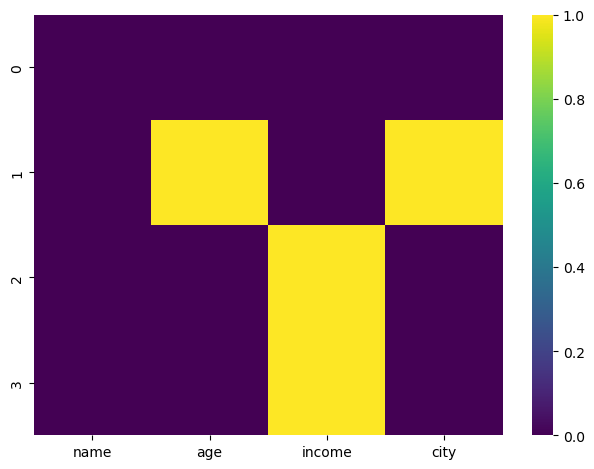

In [43]:
sns.heatmap(mess_blueprint, cmap = 'viridis')
plt.tight_layout()

In [44]:
collapsed_map = mess_blueprint.any(axis = 1)
collapsed_map

0    False
1     True
2     True
3     True
dtype: bool

In [45]:
df.loc[~collapsed_map]

,name,age,income,city
0,Anna,29,50000,Sydney


## Micro-challenge 2
### Scenario:
You’ve already learned how to detect and remove missing-value rows.
Now, your task is to measure how much missingness exists — by column and overall — so you can prioritise which features to clean or drop in a real workflow.

### Objective

Compute:

* The count of missing entries per column.
* The percentage of missing entries per column.
* The total percentage of missing cells in the whole DataFrame.

In [48]:
data = {
    "name": ["Anna", "Ben", "Cara", "Dan", "Eli"],
    "age": [29, np.nan, 31, 27, ""],
    "income": [50000, 42000, -999, "unknown", 48000],
    "city": ["Sydney", "", "Brisbane", "Cairns", np.nan]
}

df = pd.DataFrame(data)
print(df)

   name  age   income      city
0  Anna   29    50000    Sydney
1   Ben  NaN    42000          
2  Cara   31     -999  Brisbane
3   Dan   27  unknown    Cairns
4   Eli         48000       NaN


In [ ]:
mask = ['', ' ', -999, '-999', 'unknown']

In [55]:
mess = df.isna() | df.map(lambda x: x in mask)
mess

,name,age,income,city
0,False,False,False,False
1,False,True,False,True
2,False,False,True,False
3,False,False,True,False
4,False,True,False,True


In [63]:
answer1 = pd.DataFrame(mess.apply(sum)).reset_index()
answer1.columns = ['Column Name', 'Number of missing data']
answer1

,Column Name,Number of missing data
0,name,0
1,age,2
2,income,2
3,city,2


In [80]:
answer2 = pd.Series(answer1['Number of missing data'].apply(lambda x: (x / df.shape[0])).rename('% missing'))
answer2

0    0.0
1    0.4
2    0.4
3    0.4
Name: % missing, dtype: float64

In [81]:
answer2 = pd.concat([answer1,answer2], axis = 1)
answer2

,Column Name,Number of missing data,% missing
0,name,0,0.0
1,age,2,0.4
2,income,2,0.4
3,city,2,0.4


In [87]:
print(f' Answer 3: {(answer2['Number of missing data'].sum()) / (df.shape[0] * df.shape[1])}')

 Answer 3: 0.3


## Micro-challenge 3
### Scenario:
You’ve got your per-column missing-data summary (answer2).
Now you want to flag which variables might need removal or imputation,
and build a quick visual snapshot to communicate data quality at a glance.

### Objectives

* Add a new column that flags whether each variable exceeds a 30 % missingness threshold.

* Count how many variables exceed that threshold.

* Produce a simple bar plot of % missing per column, colouring or annotating the flagged ones.

In [89]:
chally3 = answer2

In [91]:
thres = 0.3

In [93]:
chally3['flag'] = chally3['% missing'] > thres
chally3

,Column Name,Number of missing data,% missing,flag
0,name,0,0.0,False
1,age,2,0.4,True
2,income,2,0.4,True
3,city,2,0.4,True


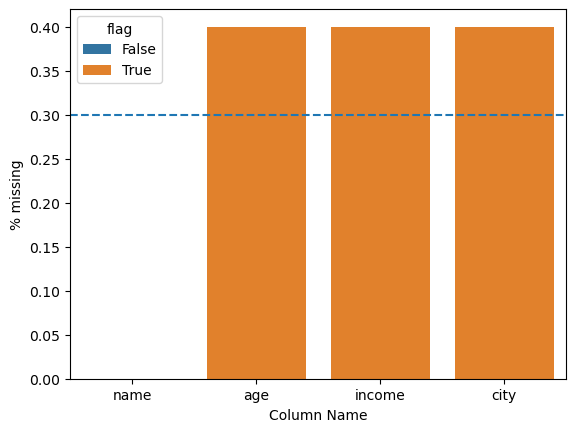

In [95]:
sns.barplot(x = 'Column Name', y = '% missing', hue = 'flag',data = chally3)
plt.axhline(thres, linestyle='--')

In [96]:
print(f"Columns > {thres*100:.0f}% missing:", int(chally3['flag'].sum()))

Columns > 30% missing: 3


## Micro-challenge 4


### Scenario:
You’ve identified that both age and income contain missing or invalid values (NaN, '', 'unknown', -999).
Now it’s time to fill (impute) those gaps with sensible defaults so your dataset is ready for analysis.

### Objectives

Convert all disguised missings in age and income into real NaNs.

Inspect each column’s numeric statistics.

Impute:

* age → fill missing values with the median age.

* income → fill missing values with the mean income.

* Verify that no missing values remain in those columns.

In [97]:
data = {
    "name": ["Anna", "Ben", "Cara", "Dan", "Eli"],
    "age": [29, np.nan, 31, 27, ""],
    "income": [50000, 42000, -999, "unknown", 48000],
    "city": ["Sydney", "", "Brisbane", "Cairns", np.nan]
}

df = pd.DataFrame(data)
print(df)

   name  age   income      city
0  Anna   29    50000    Sydney
1   Ben  NaN    42000          
2  Cara   31     -999  Brisbane
3   Dan   27  unknown    Cairns
4   Eli         48000       NaN


In [98]:
df = df.drop('city', axis = 1)
df

,name,age,income
0,Anna,29,50000
1,Ben,NaN,42000
2,Cara,31,-999
3,Dan,27,unknown
4,Eli,,48000


In [104]:
df['age'] = pd.to_numeric(df['age'], errors = 'coerce')
df['income'] = pd.to_numeric(df['income'], errors = 'coerce')
df['income'] = df['income'].replace(to_replace=[-999], value = np.nan)
df

,name,age,income
0,Anna,29.0,50000.0
1,Ben,NaN,42000.0
2,Cara,31.0,NaN
3,Dan,27.0,NaN
4,Eli,NaN,48000.0


In [106]:
df['age'] = df['age'].fillna(df['age'].median())
df['income'] = df['income'].fillna(df['income'].median())

In [107]:
df

,name,age,income
0,Anna,29.0,50000.0
1,Ben,29.0,42000.0
2,Cara,31.0,48000.0
3,Dan,27.0,48000.0
4,Eli,29.0,48000.0


# === End of Challenge! ===